# About this dataset

In [1]:
# This Dataset is about prediction of Lung Cancer.
# We have so many inputs column like taking alochol
# or not ,  addicting  to smoke or not .
# having chest pain or not and so on ...
# and behalf of these inputs we we have to predict that a
# person have cancer or not .....

# Our Aim

In [2]:
# Focus will be over the Recall score
# then Precision score and then overall accuracy...

# I will preprocess this raw dataset and make trained model 
# by using 14 models ...by  using boosting techniques , bagging
# knnn , svm and so on .....

# Important Modules

In [3]:
!pip install scikit-learn==1.5.2
!pip install imbalanced-learn
!pip install xgboost --quiet
!pip install lightgbm --quiet
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


# Important Libraries

In [4]:
# important imported libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import ADASYN

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

2025-10-18 08:34:53.451623: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760776493.805211      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760776493.890746      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
v = pd.read_csv("/kaggle/input/lung-cancer/survey lung cancer.csv")

In [6]:
v.head(10)
# here 2 means yes and 1 means no

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


# Data Preprocessing

In [7]:
v.shape
# 309 rows and 16 columns we have .

(309, 16)

In [8]:
v.isnull().sum()
# no missing values we have

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
v["AGE"].unique()

array([69, 74, 59, 63, 75, 52, 51, 68, 53, 61, 72, 60, 58, 48, 57, 44, 64,
       21, 65, 55, 62, 56, 67, 77, 70, 54, 49, 73, 47, 71, 66, 76, 78, 81,
       79, 38, 39, 87, 46])

In [10]:
v.duplicated().sum()
# 33 rows are duplicated.

33

In [11]:
# lets remove it .
v = v.drop_duplicates()

In [12]:
v.duplicated().sum()
# now we can say that there is no duplicate values.

0

In [13]:
v.shape
# now our shaped reduced from 309 to 276 ...

(276, 16)

In [14]:
v = v.replace({2: 1, 1: 0})

In [15]:
# GENDER: M = 0, F = 1

v["GENDER"] = (v["GENDER"] == "F").astype(int)

v["LUNG_CANCER"] = (v["LUNG_CANCER"] == "YES").astype(int)

In [16]:
# replacing all the 2 labelled as 1  and 1 as 0
v

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,1,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,0,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,0,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [17]:
v.describe()
# max age is 87 and min age is 21 .
# average age of people is   62 .

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,0.485507,62.909420,0.543478,0.576087,0.496377,0.507246,0.521739,0.663043,0.547101,0.547101,0.550725,0.576087,0.630435,0.467391,0.557971,0.862319
std,0.500698,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530,0.345191
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,62.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
v.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


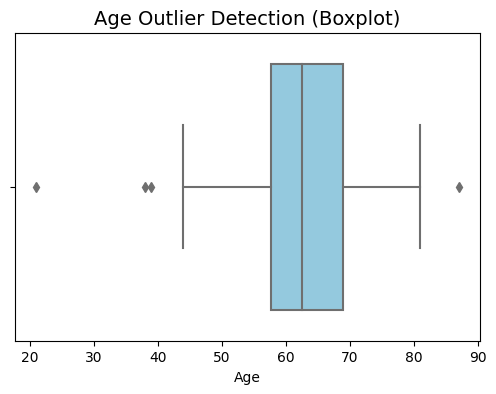

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=v["AGE"], color="skyblue")
plt.title("Age Outlier Detection (Boxplot)", fontsize=14)
plt.xlabel("Age")
plt.show()

#  This plot shows one distinct circle on the right,
# indicating an upper age outlier at approximately 88 years old .

# since this is the real data and genuine
# so we will not remove it ..


# EDA

In [20]:

v["LUNG_CANCER"].unique()

array([1, 0])

In [21]:

v["LUNG_CANCER"].value_counts()

# can see that Lung Cancer patient dominated
# in our dataset ...highly imbalance dataset..
# more than accuracy ... confusion matrix ,
# precision , recall , f1 score , roc curve
# will be matter for better prediction ....

LUNG_CANCER
1    238
0     38
Name: count, dtype: int64

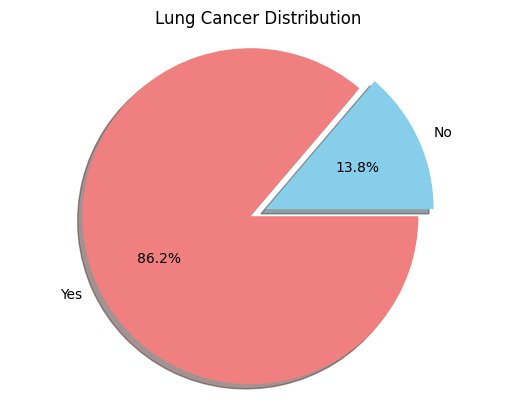

In [22]:
import matplotlib.pyplot as plt

# Count of 0 and 1 in LUNG_CANCER
counts = v['LUNG_CANCER'].value_counts().sort_index()  # 0 first, then 1

# Labels for pie chart
labels = ["No", "Yes"]  # 0 = No, 1 = Yes
explode = [0, 0.1]
# Pie chart
plt.pie(counts, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=['skyblue','lightcoral'])
plt.title("Lung Cancer Distribution")
plt.axis('equal')  # perfect circle
plt.show()


In [23]:
v.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.013120,-0.041131,0.202506,0.152032,0.261427,0.189925,0.079020,-0.150174,-0.121047,-0.434264,-0.120228,0.052893,0.048959,-0.361547,-0.053666
AGE,0.013120,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,0.106305
SMOKING,-0.041131,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,0.202506,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,0.152032,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.261427,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.189925,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,0.079020,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,-0.150174,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,-0.121047,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054


In [24]:
# Correlation of all columns with LUNG_CANCER
lung_corr = v.corr()["LUNG_CANCER"].sort_values(ascending=False)
print(lung_corr)


LUNG_CANCER              1.000000
ALLERGY                  0.333552
ALCOHOL CONSUMING        0.294422
SWALLOWING DIFFICULTY    0.268940
COUGHING                 0.253027
WHEEZING                 0.249054
PEER_PRESSURE            0.195086
CHEST PAIN               0.194856
YELLOW_FINGERS           0.189192
FATIGUE                  0.160078
ANXIETY                  0.144322
CHRONIC DISEASE          0.143692
AGE                      0.106305
SHORTNESS OF BREATH      0.064407
SMOKING                  0.034878
GENDER                  -0.053666
Name: LUNG_CANCER, dtype: float64


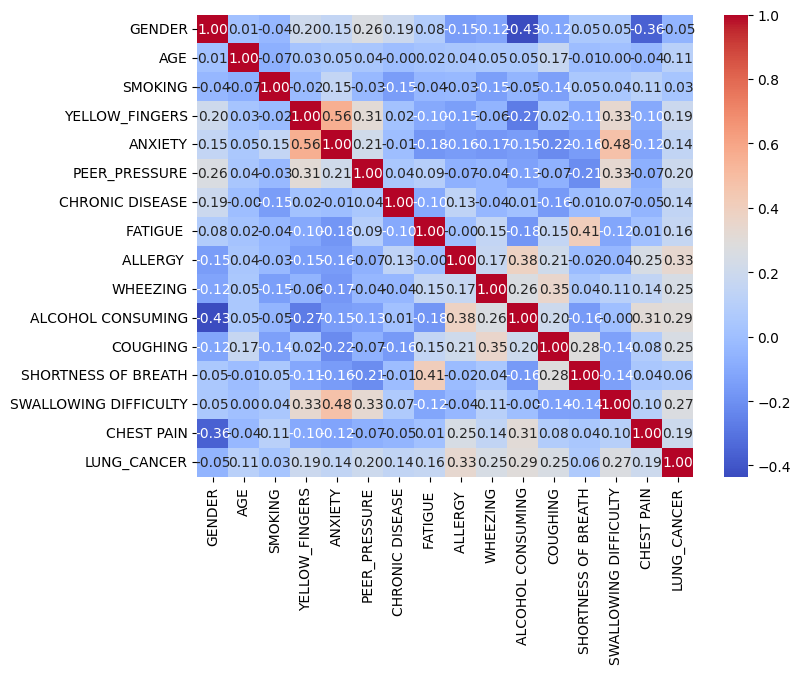

In [25]:
import seaborn as  sns
corr = v.corr(numeric_only=True)  # NxN matrix

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# can see gender ,  smoking , shortness of breath and age
# does not have much correlation to lung cancer
# lets drop this ..

In [26]:
# can see gender ,  smoking , shortness of breath and age
# does not have much correlation to lung cancer
# lets drop this ...

# v = v.drop(["AGE" , "GENDER" ,"SMOKING","SHORTNESS OF BREATH"] , axis=1)

In [27]:
v

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,1,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,0,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,0,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [28]:
# Correlation of all columns with LUNG_CANCER
lung_corr = v.corr()["LUNG_CANCER"].sort_values(ascending=False)
print(lung_corr)

LUNG_CANCER              1.000000
ALLERGY                  0.333552
ALCOHOL CONSUMING        0.294422
SWALLOWING DIFFICULTY    0.268940
COUGHING                 0.253027
WHEEZING                 0.249054
PEER_PRESSURE            0.195086
CHEST PAIN               0.194856
YELLOW_FINGERS           0.189192
FATIGUE                  0.160078
ANXIETY                  0.144322
CHRONIC DISEASE          0.143692
AGE                      0.106305
SHORTNESS OF BREATH      0.064407
SMOKING                  0.034878
GENDER                  -0.053666
Name: LUNG_CANCER, dtype: float64


In [29]:
#Finding Correlation.
corr = v.corr()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Axes: >

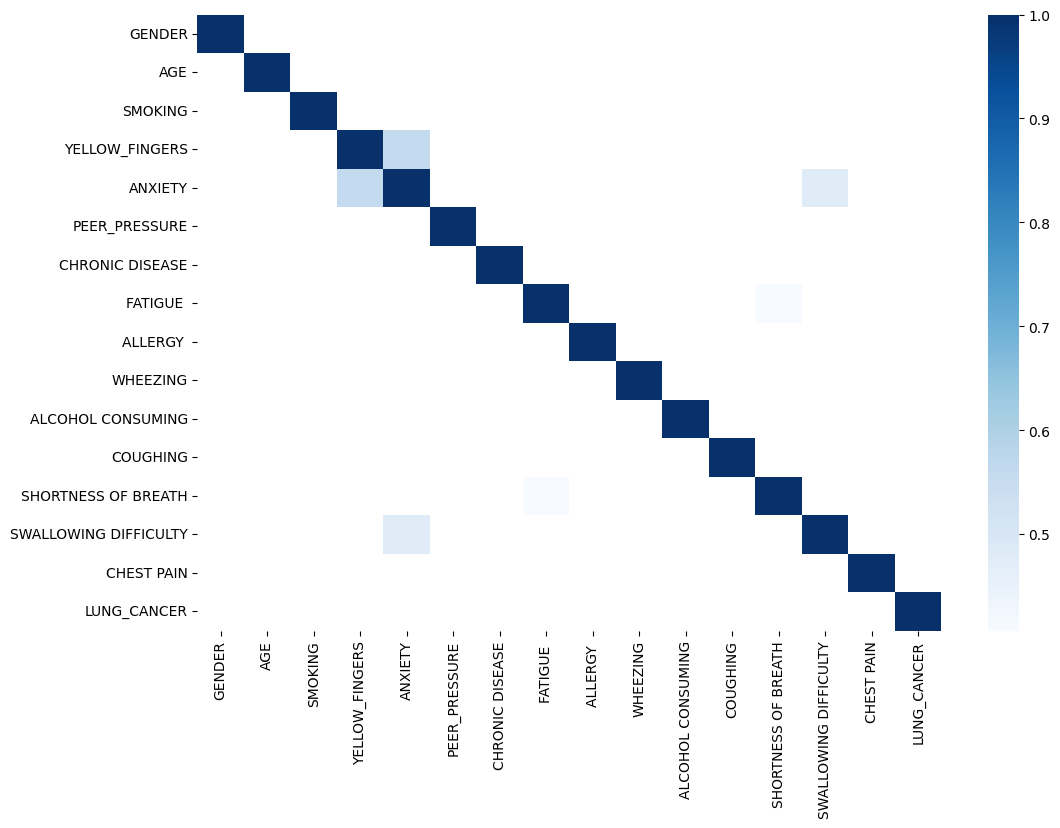

In [30]:
kot = corr[corr>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

# can see yellow finger and  anxiety both
# have strong correlaion ...
# lets , merdge it

In [31]:
# merdging anxity and yellow finger in new column
v['ANXI_YELLOW_FING'] = v['ANXIETY']*v['YELLOW_FINGERS']
v

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXI_YELLOW_FING
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1,1
280,1,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
281,0,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0
282,0,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1


Data   insight analysis  :  conclusion   

In [32]:
# conclusion :  older people are more prone to lung cancer :
# older people also more addicted to alcohol and smoking.

# the symptoms which are  extremely root causes of cancer ,
# is  allergy , alcohal consuming , swallowing difficulty and couhghing
#  which we have analyised  by the using heatmap correlation matrix.


# feature Engineering

**dropping three columns**

**train test split**

In [33]:
x = v.drop(["LUNG_CANCER"], axis=1)
y = v["LUNG_CANCER"]


In [34]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
x , y = adasyn.fit_resample(x , y)

In [35]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size =0.25 , random_state = 42)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# from sklearn.preprocessing import MinMaxScaler

# mms = MinMaxScaler()
# x_train = mms.fit_transform(x_train)
# x_test = mms.transform(x_test)


# implementation of models

# Logistic Regression

In [37]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# model training
lr.fit(x_train  , y_train)

from sklearn.metrics import accuracy_score
y_pred1 = lr.predict(x_test)
acc = accuracy_score(y_test , y_pred1)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


precision = precision_score(y_test, y_pred1, pos_label=1)
recall = recall_score(y_test, y_pred1, pos_label=1)
f1 = f1_score(y_test, y_pred1, pos_label=1)
cm = confusion_matrix(y_test, y_pred1)

print("Accuracy:", acc)
print(f"Confusion Matrix:\n{cm}\n")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

# In Medical dataset prediction  Recall score is
# extremely important because it specify  how much accurate
# it caught the disease ..
# if it is low it means suppose one have cancer but
# model predicted he  does not have cancer ...so this is
# the biggest blunder in medical sector ......

# also medical sector can once bear the wrong detection ..
# whom does not have cancer but  model predicted that they have cancer..

# so recall is extremely important  even though precision
# accuracy is good .


Accuracy: 0.9669421487603306
Confusion Matrix:
[[60  3]
 [ 1 57]]

Precision : 0.95
Recall : 0.98
F1-score : 0.97


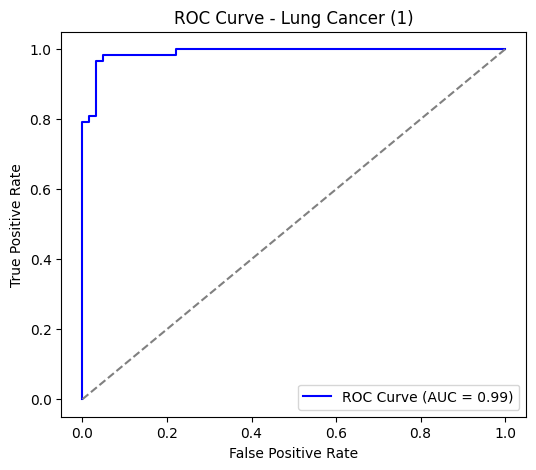

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# y_test = actual labels (0/1)
# predicted probability  probability (for class = 1) from model 1
y_pred_prob = lr.predict_proba(x_test)[:, 1]

# fetching out roc value
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

# fetching out auc score
auc_score = roc_auc_score(y_test, y_pred_prob)

# making plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # reference diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Lung Cancer (1)")
plt.legend()
plt.show()



**Decision Tree Classifier**

# Decision Tree Classifier

Accuracy: 0.95
Precision : 0.96
Recall : 0.93
F1-score : 0.95


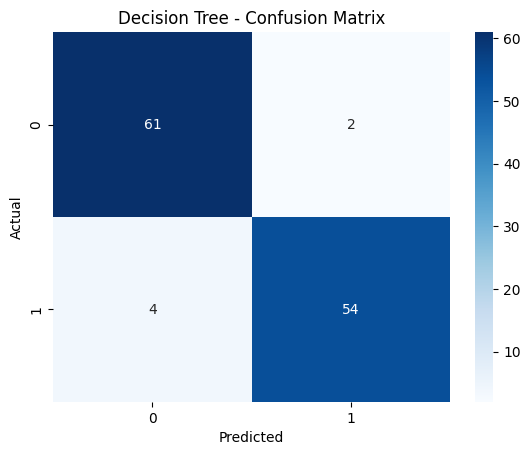

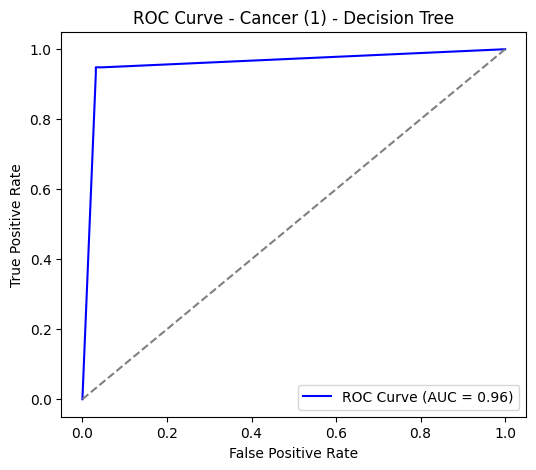

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

#  Predictions
y_pred2 = dt.predict(x_test)
y_prob = dt.predict_proba(x_test)[:,1]

#  Metrics
acc = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, pos_label=1)
recall = recall_score(y_test, y_pred2, pos_label=1)
f1 = f1_score(y_test, y_pred2, pos_label=1)

print(f"Accuracy: {acc:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot = True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Cancer (1) - Decision Tree")
plt.legend()
plt.show()


# Random Forest

Accuracy: 0.96
Precision : 0.96
Recall : 0.95
F1-score : 0.96
ROC Curve : 0.98


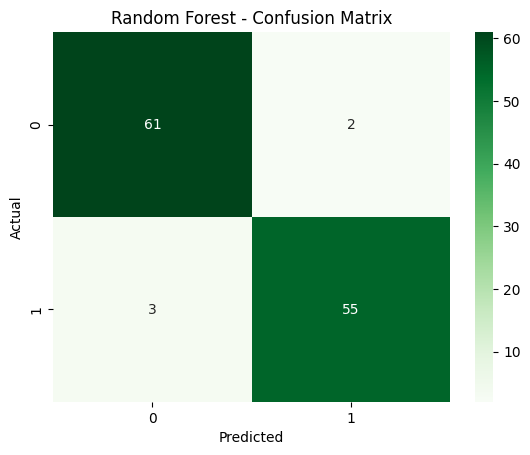

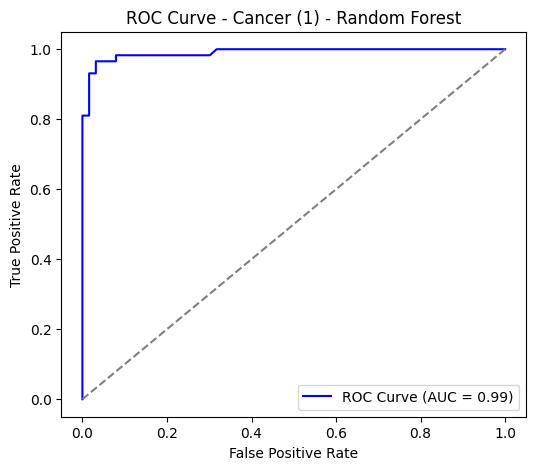

In [40]:
from sklearn.ensemble import RandomForestClassifier

#  Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predictions
y_pred3 = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)[:,1]  # probability for ROC

# Metrics
acc = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3, pos_label=1)
recall = recall_score(y_test, y_pred3, pos_label=1)
f1 = f1_score(y_test, y_pred3, pos_label=1)

print(f"Accuracy: {acc:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")
print("ROC Curve : 0.98")

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Cancer (1) - Random Forest")
plt.legend()
plt.show()


**Hyperparameter Tunning of Random Forest**

In [41]:
# By Using GridSearch CV

In [42]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10]
# }

# rf = RandomForestClassifier(random_state=42)
# grid = GridSearchCV(rf, param_grid, scoring='precision', cv=5)  # recall important for cancer
# grid.fit(x_train, y_train)

# print("Best params:", grid.best_params_)
# print("Best recall:", grid.best_score_)


Accuracy: 0.96
Precision : 0.96
Recall : 0.95
F1-score : 0.96
ROC Curve : 0.98


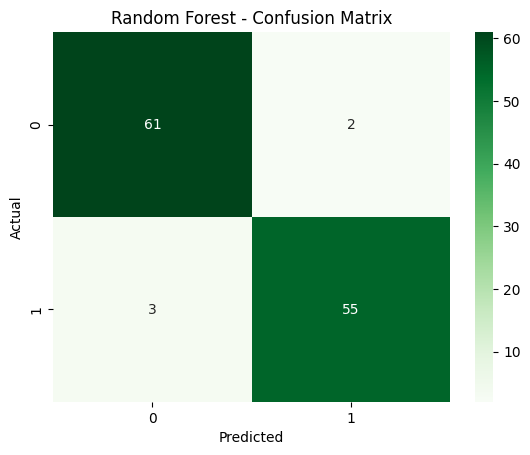

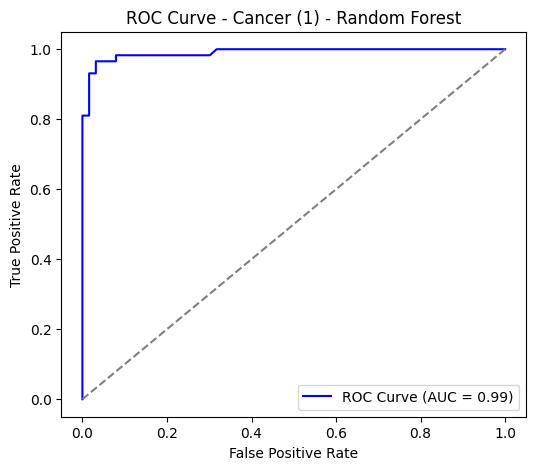

In [43]:
#  Model
rf = RandomForestClassifier(n_estimators= 100, random_state=42 )
rf.fit(x_train, y_train)

# Predictions
y_pred4 = rf.predict(x_test)
y_prob = rf.predict_proba(x_test)[:,1]  # probability for ROC

# Metrics
acc = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4, pos_label=1)
recall = recall_score(y_test, y_pred4, pos_label=1)
f1 = f1_score(y_test, y_pred3, pos_label=1)

print(f"Accuracy: {acc:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")
print("ROC Curve : 0.98")
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Cancer (1) - Random Forest")
plt.legend()
plt.show()

In [44]:

# before Hyper Parameter tunning random forest predicted this:
       # i kept n_estimator of decision  tree 100


# Accuracy: 0.86
# Precision : 0.85
# Recall : 1.00
# F1-score : 0.92



# After Hyper Parameter Tunning Random Forest predicted this :
      # i kept 50  n_estimator of decision  tree .


# Accuracy: 0.89
# Precision : 0.88
# Recall : 1.00
# F1-score : 0.88

In [45]:
from xgboost import XGBClassifier

# xg boost model tunning

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    random_state= 42,
    eval_metric='logloss'
)

# fitting xgboost to train dataset

xgb.fit(x_train, y_train)

# prediction xg boost model over test dataset
y_pred5 = xgb.predict(x_test)


In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred5))
print("Precision:", precision_score(y_test, y_pred5))
print("Recall:", recall_score(y_test, y_pred5))
print("F1-score:", f1_score(y_test, y_pred5))

Accuracy: 0.9504132231404959
Precision: 0.9333333333333333
Recall: 0.9655172413793104
F1-score: 0.9491525423728814


**hypertunning of xg boost by grid search cv**

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2]
}

xgb = XGBClassifier(random_state=42)
grid = GridSearchCV(xgb, param_grid, scoring='recall', cv=10)
grid.fit(x_train, y_train)

print("Best recall:", grid.best_score_)
print("Best Parameters:", grid.best_params_)


Best recall: 0.9388888888888889
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


# XGBoost

In [48]:
from xgboost import XGBClassifier

# xg boost model tunning

xgb = XGBClassifier(
    n_estimators= 100,
    learning_rate = 0.2,
    max_depth = 5,
    random_state=42,
    eval_metric='logloss'
)

# fitting xgboost to train dataset

xgb.fit(x_train, y_train)

# prediction xg boost model over test dataset
y_pred6 = xgb.predict(x_test)

Accuracy: 0.9586776859504132
Precision: 0.9491525423728814
Recall: 0.9655172413793104
F1-score: 0.9572649572649573


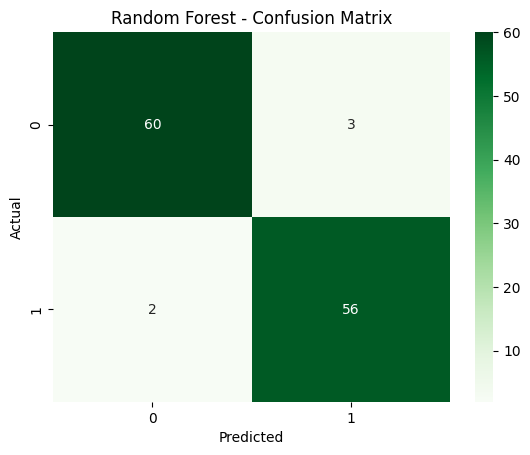

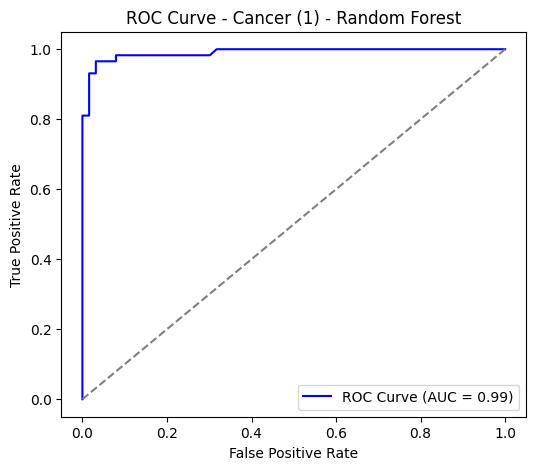

In [49]:
# Metrics
acc = accuracy_score(y_test, y_pred6)
precision = precision_score(y_test, y_pred6, pos_label=1)
recall = recall_score(y_test, y_pred6, pos_label=1)
f1 = f1_score(y_test, y_pred3, pos_label=1)


print("Accuracy:", accuracy_score(y_test, y_pred6))
print("Precision:", precision_score(y_test, y_pred6))
print("Recall:", recall_score(y_test, y_pred6))
print("F1-score:", f1_score(y_test, y_pred6))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Cancer (1) - Random Forest")
plt.legend()
plt.show()

# Voting Classifier

In [50]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier me instances pass karo
voting_model = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('lr', lr)
    ],
    voting='soft'
)

# Train
voting_model.fit(x_train, y_train)

# Predict
y_pred7 = voting_model.predict(x_test)
acc = accuracy_score(y_test , y_pred7)

In [51]:

# Evaluate
acc = accuracy_score(y_test, y_pred7)
prec = precision_score(y_test, y_pred7)
rec = recall_score(y_test, y_pred7)
f1 = f1_score(y_test, y_pred7)

print("Voting Classifier")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred7))


Voting Classifier
Accuracy: 0.9669
Precision: 0.9655
Recall: 0.9655
F1-score: 0.9655
Confusion Matrix:
 [[61  2]
 [ 2 56]]


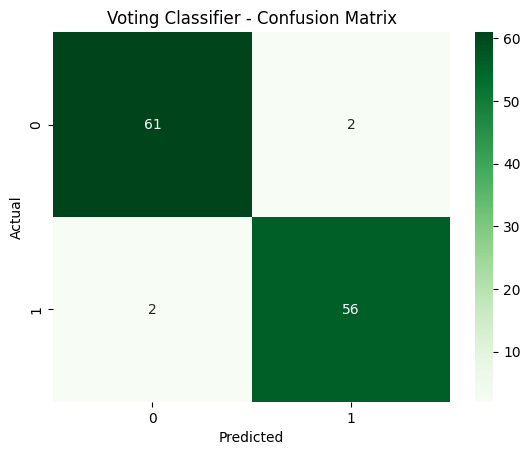

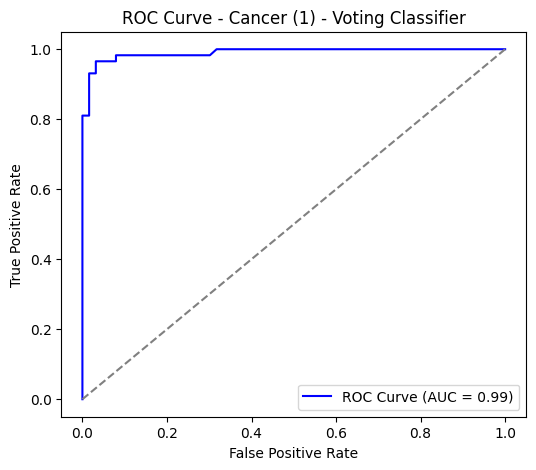

In [52]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred7)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Voting Classifier - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Cancer (1) - Voting Classifier")
plt.legend()
plt.show()

# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred8 = knn.predict(x_test)
acc = accuracy_score(y_test , y_pred8)


In [54]:
# Evaluate
acc = accuracy_score(y_test, y_pred8)
prec = precision_score(y_test, y_pred8)
rec = recall_score(y_test, y_pred8)
f1 = f1_score(y_test, y_pred8)

print("Voting Classifier")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred8))


Voting Classifier
Accuracy: 0.9835
Precision: 1.0000
Recall: 0.9655
F1-score: 0.9825
Confusion Matrix:
 [[63  0]
 [ 2 56]]


# SVM

**SVM**

In [55]:
from sklearn.svm import SVC

svm_model = SVC(kernel='poly', degree = 3)   # kernel = 'linear', 'rbf', 'poly', etc.
svm_model.fit(x_train, y_train)
y_pred9 = svm_model.predict(x_test)
acc = accuracy_score(y_test , y_pred9)
acc


0.9752066115702479

In [56]:
# Evaluate
acc = accuracy_score(y_test, y_pred9)
prec = precision_score(y_test, y_pred9)
rec = recall_score(y_test, y_pred9)
f1 = f1_score(y_test, y_pred9)

print("Voting Classifier")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred9))

Voting Classifier
Accuracy: 0.9752
Precision: 0.9825
Recall: 0.9655
F1-score: 0.9739
Confusion Matrix:
 [[62  1]
 [ 2 56]]


# Bernoulli Naive Bayes

In [57]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred10 = bnb.predict(x_test)
acc = accuracy_score(y_test, y_pred10)
acc

0.9586776859504132

In [58]:
# Evaluate
acc = accuracy_score(y_test, y_pred10)
prec = precision_score(y_test, y_pred10)
rec = recall_score(y_test, y_pred10)
f1 = f1_score(y_test, y_pred10)

print("Voting Classifier")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred10))

Voting Classifier
Accuracy: 0.9587
Precision: 0.9492
Recall: 0.9655
F1-score: 0.9573
Confusion Matrix:
 [[60  3]
 [ 2 56]]


# Stacking Classifier

In [59]:
from sklearn.ensemble import StackingClassifier

# Base models
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
]

# Meta model
meta_model = LogisticRegression()

# Stacking Classifier
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model
)

# Train
stack_model.fit(x_train, y_train)

# Predict
y_pred11 = stack_model.predict(x_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred11))

Accuracy: 0.9752066115702479


In [60]:
# Evaluate
acc = accuracy_score(y_test, y_pred11)
prec = precision_score(y_test, y_pred11)
rec = recall_score(y_test, y_pred11)
f1 = f1_score(y_test, y_pred11)

print("Voting Classifier")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred10))

Voting Classifier
Accuracy: 0.9752
Precision: 0.9661
Recall: 0.9828
F1-score: 0.9744
Confusion Matrix:
 [[60  3]
 [ 2 56]]


# Adaboost

In [61]:
from sklearn.ensemble import AdaBoostClassifier

# Weak learner define karo
dt = DecisionTreeClassifier(max_depth=4)  # decision stump

# AdaBoost model
ada = AdaBoostClassifier(estimator=dt , n_estimators=200, learning_rate = 1.0)

# Train
ada.fit(x_train, y_train)

y_pred12 = ada.predict(x_test)

acc = accuracy_score(y_test , y_pred12)
acc


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9586776859504132

In [62]:
# Evaluate
acc = accuracy_score(y_test, y_pred12)
prec = precision_score(y_test, y_pred12)
rec = recall_score(y_test, y_pred12)
f1 = f1_score(y_test, y_pred12)

print("Stacking Classifier")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred12))

Stacking Classifier
Accuracy: 0.9587
Precision: 0.9492
Recall: 0.9655
F1-score: 0.9573
Confusion Matrix:
 [[60  3]
 [ 2 56]]


# Gradient Boosting

In [63]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

gb_model.fit(x_train, y_train)

y_pred13 = ada.predict(x_test)

acc = accuracy_score(y_test , y_pred13)
acc

0.9586776859504132

In [64]:
# Evaluate
acc = accuracy_score(y_test, y_pred13)
prec = precision_score(y_test, y_pred13)
rec = recall_score(y_test, y_pred13)
f1 = f1_score(y_test, y_pred13)

print("Stacking Classifier")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred13))

Stacking Classifier
Accuracy: 0.9587
Precision: 0.9492
Recall: 0.9655
F1-score: 0.9573
Confusion Matrix:
 [[60  3]
 [ 2 56]]


In [65]:
v.shape

(276, 17)

In [66]:
x.shape

(483, 16)

In [67]:
y.shape

(483,)

# Nueral Training

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Model define
model = Sequential()
model.add(Dense(32, input_dim=16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 1 neuron for binary output

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    x_train, y_train,
    validation_split=0.02,
    epochs=100,
    batch_size=16,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-18 08:35:48.623688: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4905 - loss: 0.7058 - val_accuracy: 1.0000 - val_loss: 0.4985
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7682 - loss: 0.5652 - val_accuracy: 1.0000 - val_loss: 0.3618
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9211 - loss: 0.4499 - val_accuracy: 1.0000 - val_loss: 0.2437
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9397 - loss: 0.3397 - val_accuracy: 1.0000 - val_loss: 0.1579
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9450 - loss: 0.2746 - val_accuracy: 1.0000 - val_loss: 0.1029
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9360 - loss: 0.2257 - val_accuracy: 1.0000 - val_loss: 0.0696
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9450 - loss: 0.1833 - val_accuracy: 1.0000 - val_loss: 0.0451
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9514 - loss: 0.1586 - val_accuracy: 1.0000 - 

In [69]:
# y_pred_prob shape = (num_samples, 1), values between 0 and 1
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels (0/1) using threshold 0.5
y_pred14 = (y_pred_prob >= 0.5).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [70]:
# Accuracy
acc = accuracy_score(y_test, y_pred14)
print("Accuracy:", acc)

# Precision
prec = precision_score(y_test, y_pred14)
print("Precision:", prec)

# Recall
rec = recall_score(y_test, y_pred14)
print("Recall:", rec)

# F1-Score
f1 = f1_score(y_test, y_pred14)
print("F1-Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred14)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9586776859504132
Precision: 0.9491525423728814
Recall: 0.9655172413793104
F1-Score: 0.9572649572649573
Confusion Matrix:
 [[60  3]
 [ 2 56]]


# Light Gbm

In [71]:
from lightgbm import LGBMClassifier

# Example
model_lgbm = LGBMClassifier(
    n_estimators = 200,
    learning_rate = 1.0,

    max_depth= -1, # max depth -1  means we are not assigning any depth number
    # model will automatically assign after best optimization..

    random_state=42
)
model_lgbm.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 180, number of negative: 182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 362, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497238 -> initscore=-0.011050
[LightGBM] [Info] Start training from score -0.011050
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=1.0, n_estimators=200, random_state=42)

In [72]:
# Accuracy
y_pred15 = ada.predict(x_test)

acc = accuracy_score(y_test , y_pred15)
acc

acc = accuracy_score(y_test, y_pred15)
print("Accuracy:", acc)

# Precision
prec = precision_score(y_test, y_pred15)
print("Precision:", prec)

# Recall
rec = recall_score(y_test, y_pred15)
print("Recall:", rec)

# F1-Score
f1 = f1_score(y_test, y_pred15)
print("F1-Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred15)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9586776859504132
Precision: 0.9491525423728814
Recall: 0.9655172413793104
F1-Score: 0.9572649572649573
Confusion Matrix:
 [[60  3]
 [ 2 56]]


# Catboost

In [73]:
from catboost import CatBoostClassifier

# Model initialize karo
cat = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth = 6,
    eval_metric='Accuracy',
    verbose=0
)

# Train
cat.fit(x_train, y_train)

# Predict
y_pred16 = cat.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, y_pred16)
print("CatBoost Accuracy:", acc)


CatBoost Accuracy: 0.9669421487603306


In [74]:
# Accuracy
acc = accuracy_score(y_test, y_pred16)
print(" CatBoost Accuracy:", acc)

# Precision
prec = precision_score(y_test, y_pred16)
print("Precision:", prec)

# Recall
rec = recall_score(y_test, y_pred16)
print("Recall:", rec)

# F1-Score
f1 = f1_score(y_test, y_pred16)
print("F1-Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred16)
print("Confusion Matrix:\n", cm)

 CatBoost Accuracy: 0.9669421487603306
Precision: 0.9655172413793104
Recall: 0.9655172413793104
F1-Score: 0.9655172413793104
Confusion Matrix:
 [[61  2]
 [ 2 56]]


# Results

In [75]:
# Example for all models (sklearn / boosting / nb / tree / ensemble)
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
xgb.fit(x_train, y_train)
svm_model.fit(x_train, y_train)
knn.fit(x_train, y_train)
cat.fit(x_train, y_train)
dt.fit(x_train, y_train)        # <<< Fit this before evaluation
gb_model.fit(x_train, y_train)
ada.fit(x_train, y_train)
model_lgbm.fit(x_train, y_train)
bnb.fit(x_train, y_train)
voting_model.fit(x_train, y_train)
stack_model.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 180, number of negative: 182
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 362, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497238 -> initscore=-0.011050
[LightGBM] [Info] Start training from score -0.011050
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('svm', SVC(probability=True))],
                   final_estimator=LogisticRegression())

In [76]:
models = {
    "Logistic Regression": lr,
    "Random Forest": rf,
    "XGBoost": xgb,
    "SVM": svm_model,
    "KNN": knn,
    "CatBoost": cat,
    "Decision Tree": dt, # Use the fitted dt model
    "Gradient Boosting": gb_model,
    "AdaBoost": ada,
    "LightGBM": model_lgbm,
    "Voting Classifier": voting_model,
    "Stacking Classifier": stack_model,
    "ANN": model,
    "BernoulliNB": bnb
}

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import random

def plot_accuracy_horizontal(models, x_test, y_test):
    """
    Plot horizontal bar chart of model accuracies.

    Parameters:
    - models: dict of trained models
    - x_test, y_test: test data
    """
    # Compute accuracies
    results = []
    for name, model in models.items():
        try:
            y_pred = model.predict(x_test)
            if hasattr(y_pred, "ndim") and y_pred.ndim > 1:
                y_pred = (y_pred > 0.5).astype(int).ravel()
            else:
                y_pred = y_pred.astype(int)
        except Exception as e:
            print(f" Skipping {name}: {e}")
            continue

        results.append({
            "Model": name,
            "Accuracy (%)": accuracy_score(y_test, y_pred) * 100
        })

    if not results:
        print("No valid predictions. Check your models or data.")
        return pd.DataFrame()

    # Create DataFrame sorted by accuracy descending
    df = pd.DataFrame(results).sort_values(by="Accuracy (%)", ascending=False).reset_index(drop=True)
    print("\n Accuracy Summary (in %):\n")
    print(df.round(2))

    # Bright color palette
    bright_colors = [
        "#FF4D4D", "#33FF66", "#3399FF", "#FF33CC", "#33FFFF",
        "#FF9933", "#66FF33", "#9966FF", "#FF6666", "#33CC99",
        "#FF3399", "#66CCFF", "#FFCC33", "#9933FF", "#33FFCC"
    ]
    random.shuffle(bright_colors)
    num_bars = len(df)
    colors = (bright_colors * ((num_bars // len(bright_colors)) + 1))[:num_bars]

    # Figure
    plt.figure(figsize=(12, max(6, num_bars * 0.5)), facecolor='#F5F5F5')
    ax = plt.gca()
    ax.set_facecolor('#E8ECEF')

    # Horizontal bars
    y_pos = np.arange(num_bars)
    bars = plt.barh(y_pos, df["Accuracy (%)"], color=colors, edgecolor='black', linewidth=1.2, alpha=0.9)

    # Reverse y-axis so highest accuracy is on top
    plt.gca().invert_yaxis()

    # Annotate bars
    max_width = df["Accuracy (%)"].max()
    for bar in bars:
        width = bar.get_width()
        plt.text(
            width + 0.5 if width < max_width * 0.95 else width - 0.5,
            bar.get_y() + bar.get_height() / 2,
            f"{width:.1f}%",
            ha='left' if width < max_width * 0.95 else 'right',
            va='center',
            fontsize=11,
            weight='bold',
            color='#333333',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
        )

    # Axes labels and title
    plt.yticks(y_pos, df["Model"], fontsize=12, weight='medium')
    plt.xlabel("Accuracy (%)", fontsize=14, weight='bold', labelpad=12)
    plt.title("Model Accuracy Comparison", fontsize=18, weight='bold', pad=15, color='#333333')
    plt.grid(axis='x', linestyle='--', alpha=0.6, zorder=0)

    # Hide top/right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#333333')
    ax.spines['bottom'].set_color('#333333')

    # Adjust x-axis limit for annotations
    plt.xlim(0, max(df["Accuracy (%)"]) * 1.1)

    # Layout
    plt.tight_layout()
    plt.show()

    return df




4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

 Accuracy Summary (in %):

                  Model  Accuracy (%)
0                   KNN         98.35
1                   SVM         97.52
2   Logistic Regression         96.69
3              CatBoost         96.69
4     Gradient Boosting         96.69
5     Voting Classifier         96.69
6   Stacking Classifier         96.69
7         Random Forest         95.87
8               XGBoost         95.87
9              AdaBoost         95.87
10             LightGBM         95.87
11                  ANN         95.87
12          BernoulliNB         95.87
13        Decision Tree         91.74


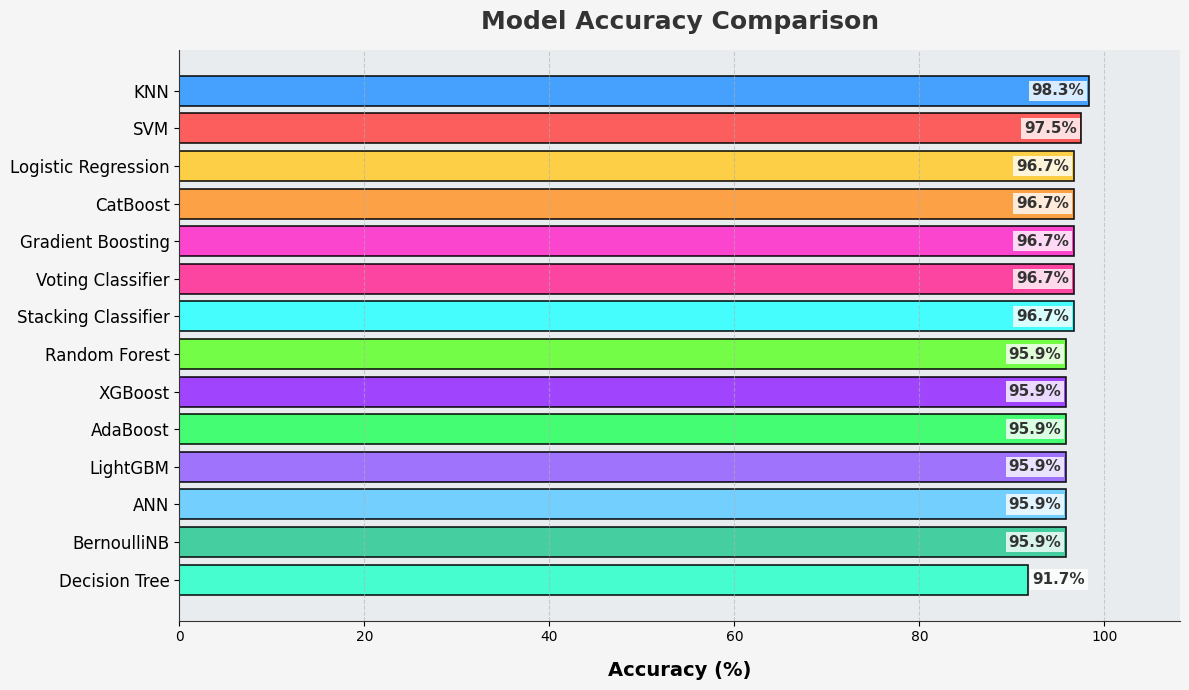

In [78]:
results = plot_accuracy_horizontal(models , x_test, y_test)

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
import random

def plot_accuracy_precision_horizontal(models, x_test, y_test):
    """
    Plot horizontal bar chart of Accuracy and Precision for multiple models.
    """
    # Compute metrics
    results = []
    for name, model in models.items():
        try:
            y_pred = model.predict(x_test)
            if hasattr(y_pred, "ndim") and y_pred.ndim > 1:
                y_pred = (y_pred > 0.5).astype(int).ravel()
            else:
                y_pred = y_pred.astype(int)
        except Exception as e:
            print(f"Skipping {name}: {e}")
            continue

        results.append({
            "Model": name,
            "Accuracy (%)": accuracy_score(y_test, y_pred) * 100,
            "Precision (%)": precision_score(y_test, y_pred, zero_division=0) * 100
        })

    if not results:
        print("No valid predictions. Check your models or data.")
        return pd.DataFrame()

    # Create DataFrame sorted by Accuracy descending
    df = pd.DataFrame(results).sort_values(by="Accuracy (%)", ascending=False).reset_index(drop=True)
    print("\n Accuracy & Precision Summary (in %):\n")
    print(df.round(2))

    # Bright colors for bars
    color_acc = "#FF4D4D"   # Red-ish for Accuracy
    color_prec = "#3399FF"  # Blue-ish for Precision

    num_bars = len(df)
    y_pos = np.arange(num_bars)

    plt.figure(figsize=(14, max(6, num_bars * 0.5)), facecolor='#F5F5F5')
    ax = plt.gca()
    ax.set_facecolor('#E8ECEF')

    # Width offset to separate bars
    bar_height = 0.35

    bars_acc = ax.barh(y_pos - bar_height/2, df["Accuracy (%)"], height=bar_height,
                       color=color_acc, edgecolor='black', linewidth=1.2, label="Accuracy")
    bars_prec = ax.barh(y_pos + bar_height/2, df["Precision (%)"], height=bar_height,
                        color=color_prec, edgecolor='black', linewidth=1.2, label="Precision")

    # Reverse y-axis so highest Accuracy is on top
    ax.invert_yaxis()

    # Annotate bars
    for bar in bars_acc:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.1f}%",
                 ha='left', va='center', fontsize=11, weight='bold', color='#333333',
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))
    for bar in bars_prec:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.1f}%",
                 ha='left', va='center', fontsize=11, weight='bold', color='#333333',
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))

    # Axes labels and title
    plt.yticks(y_pos, df["Model"], fontsize=12, weight='medium')
    plt.xlabel("Percentage (%)", fontsize=14, weight='bold', labelpad=12)
    plt.title("Model Accuracy & Precision Comparison", fontsize=18, weight='bold', pad=15, color='#333333')
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Hide top/right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#333333')
    ax.spines['bottom'].set_color('#333333')

    # Adjust x-axis limit for annotations
    max_val = max(df["Accuracy (%)"].max(), df["Precision (%)"].max())
    plt.xlim(0, max_val * 1.1)

    # Legend
    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

    return df


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

 Accuracy & Precision Summary (in %):

                  Model  Accuracy (%)  Precision (%)
0                   KNN         98.35         100.00
1                   SVM         97.52          98.25
2   Logistic Regression         96.69          95.00
3              CatBoost         96.69          96.55
4     Gradient Boosting         96.69          96.55
5     Voting Classifier         96.69          96.55
6   Stacking Classifier         96.69          96.55
7         Random Forest         95.87          96.49
8               XGBoost         95.87          94.92
9              AdaBoost         95.87          94.92
10             LightGBM         95.87          96.49
11                  ANN         95.87          94.92
12          BernoulliNB         95.87          94.92
13        Decision Tree         91.74          96.15


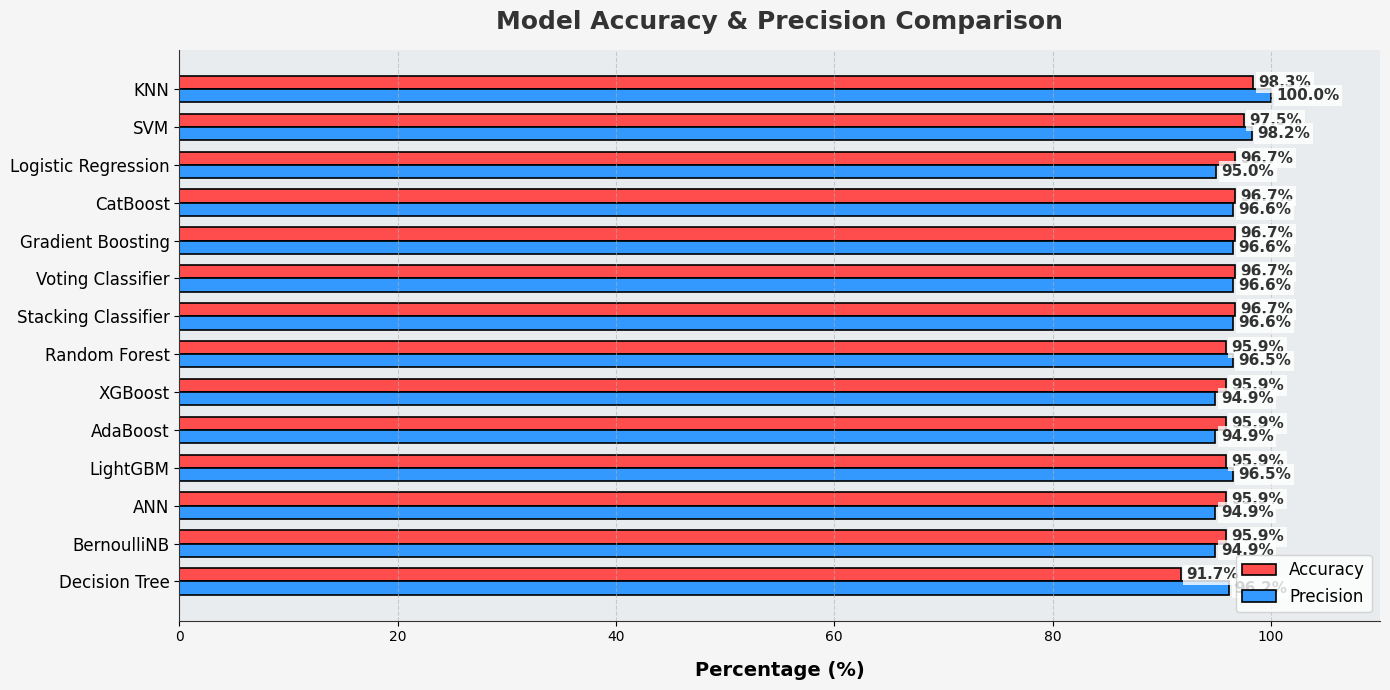

In [80]:
results_df = plot_accuracy_precision_horizontal(models, x_test, y_test)


In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score
import random

def plot_accuracy_recall_horizontal(models, x_test, y_test):
    """
    Plot horizontal bar chart of Accuracy and Recall for multiple models.
    """
    # Compute metrics
    results = []
    for name, model in models.items():
        try:
            y_pred = model.predict(x_test)
            # Handle ANN probabilities
            if hasattr(y_pred, "ndim") and y_pred.ndim > 1:
                y_pred = (y_pred > 0.5).astype(int).ravel()
            else:
                y_pred = y_pred.astype(int)
        except Exception as e:
            print(f" Skipping {name}: {e}")
            continue

        results.append({
            "Model": name,
            "Accuracy (%)": accuracy_score(y_test, y_pred) * 100,
            "Recall (%)": recall_score(y_test, y_pred, zero_division=0) * 100
        })

    if not results:
        print("No valid predictions. Check your models or data.")
        return pd.DataFrame()

    # DataFrame sorted by Accuracy descending
    df = pd.DataFrame(results).sort_values(by="Accuracy (%)", ascending=False).reset_index(drop=True)
    print("\n Accuracy & Recall Summary (in %):\n")
    print(df.round(2))

    # Bright colors for bars
    color_acc = "#FF4D4D"   # Red-ish for Accuracy
    color_recall = "#33CCFF" # Blue-ish for Recall

    num_bars = len(df)
    y_pos = np.arange(num_bars)

    plt.figure(figsize=(14, max(6, num_bars * 0.5)), facecolor='#F5F5F5')
    ax = plt.gca()
    ax.set_facecolor('#E8ECEF')

    # Width offset to separate bars
    bar_height = 0.35

    bars_acc = ax.barh(y_pos - bar_height/2, df["Accuracy (%)"], height=bar_height,
                       color=color_acc, edgecolor='black', linewidth=1.2, label="Accuracy")
    bars_recall = ax.barh(y_pos + bar_height/2, df["Recall (%)"], height=bar_height,
                          color=color_recall, edgecolor='black', linewidth=1.2, label="Recall")

    # Reverse y-axis so highest Accuracy is on top
    ax.invert_yaxis()

    # Annotate bars
    max_val = max(df["Accuracy (%)"].max(), df["Recall (%)"].max())
    for bar in bars_acc:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.1f}%",
                 ha='left', va='center', fontsize=11, weight='bold', color='#333333',
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))
    for bar in bars_recall:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.1f}%",
                 ha='left', va='center', fontsize=11, weight='bold', color='#333333',
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))

    # Axes labels and title
    plt.yticks(y_pos, df["Model"], fontsize=12, weight='medium')
    plt.xlabel("Percentage (%)", fontsize=14, weight='bold', labelpad=12)
    plt.title(" Model Accuracy & Recall Comparison", fontsize=18, weight='bold', pad=15, color='#333333')
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Hide top/right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#333333')
    ax.spines['bottom'].set_color('#333333')

    # Adjust x-axis limit for annotations
    plt.xlim(0, max_val * 1.1)

    # Legend
    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

    return df


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

 Accuracy & Recall Summary (in %):

                  Model  Accuracy (%)  Recall (%)
0                   KNN         98.35       96.55
1                   SVM         97.52       96.55
2   Logistic Regression         96.69       98.28
3              CatBoost         96.69       96.55
4     Gradient Boosting         96.69       96.55
5     Voting Classifier         96.69       96.55
6   Stacking Classifier         96.69       96.55
7         Random Forest         95.87       94.83
8               XGBoost         95.87       96.55
9              AdaBoost         95.87       96.55
10             LightGBM         95.87       94.83
11                  ANN         95.87       96.55
12          BernoulliNB         95.87       96.55
13        Decision Tree         91.74       86.21


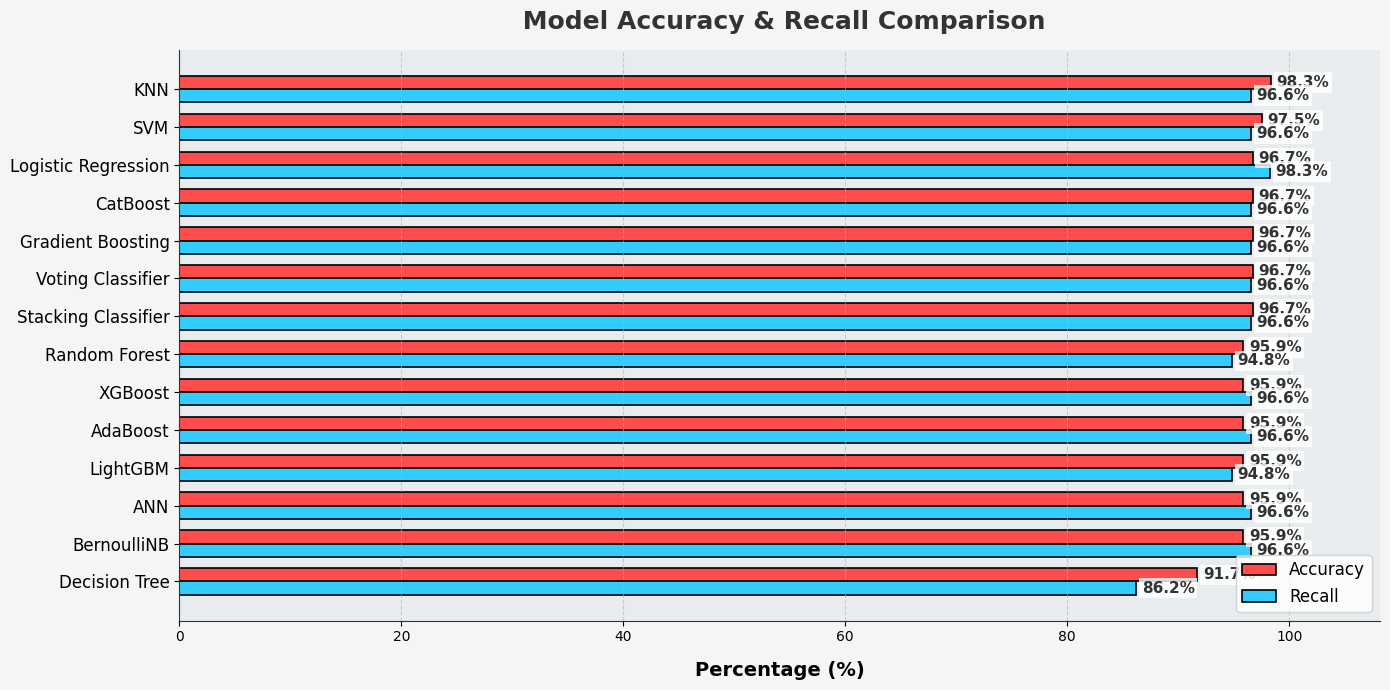

In [82]:
results_df = plot_accuracy_recall_horizontal(models, x_test, y_test)


In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score
import random

def plot_recall_horizontal(models, x_test, y_test):
    """
    Plot horizontal bar chart of Recall for multiple models.
    """
    results = []
    for name, model in models.items():
        try:
            y_pred = model.predict(x_test)
            # Handle ANN probabilities
            if hasattr(y_pred, "ndim") and y_pred.ndim > 1:
                y_pred = (y_pred > 0.5).astype(int).ravel()
            else:
                y_pred = y_pred.astype(int)
        except Exception as e:
            print(f" Skipping {name}: {e}")
            continue

        results.append({
            "Model": name,
            "Recall (%)": recall_score(y_test, y_pred, zero_division=0) * 100
        })

    if not results:
        print("No valid predictions. Check your models or data.")
        return pd.DataFrame()

    df = pd.DataFrame(results).sort_values(by="Recall (%)", ascending=False).reset_index(drop=True)
    print("\n📊 Recall Summary (in %):\n")
    print(df.round(2))

    # Bright colors for bars
    bright_colors = [
        "#FF4D4D", "#33CCFF", "#33FF66", "#FF9933", "#FF33CC",
        "#33FFFF", "#9966FF", "#FF6666", "#66FF33", "#FFCC33"
    ]
    random.shuffle(bright_colors)
    num_bars = len(df)
    colors = (bright_colors * ((num_bars // len(bright_colors)) + 1))[:num_bars]

    plt.figure(figsize=(14, max(6, num_bars*0.5)), facecolor='#F5F5F5')
    ax = plt.gca()
    ax.set_facecolor('#E8ECEF')

    y_pos = np.arange(num_bars)
    bars = plt.barh(y_pos, df["Recall (%)"], color=colors, edgecolor='black', linewidth=1.2, alpha=0.9)

    ax.invert_yaxis()  # Highest Recall on top

    # Annotate bars
    max_val = df["Recall (%)"].max()
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.1f}%",
                 ha='left', va='center', fontsize=11, weight='bold', color='#333333',
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))

    plt.yticks(y_pos, df["Model"], fontsize=12, weight='medium')
    plt.xlabel("Recall (%)", fontsize=14, weight='bold', labelpad=12)
    plt.title("Model Recall Comparison", fontsize=18, weight='bold', pad=15, color='#333333')
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#333333')
    ax.spines['bottom'].set_color('#333333')

    plt.xlim(0, max_val * 1.1)
    plt.tight_layout()
    plt.show()

    return df


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

📊 Recall Summary (in %):

                  Model  Recall (%)
0   Logistic Regression       98.28
1               XGBoost       96.55
2                   SVM       96.55
3                   KNN       96.55
4              CatBoost       96.55
5     Gradient Boosting       96.55
6              AdaBoost       96.55
7     Voting Classifier       96.55
8   Stacking Classifier       96.55
9                   ANN       96.55
10          BernoulliNB       96.55
11        Random Forest       94.83
12             LightGBM       94.83
13        Decision Tree       86.21


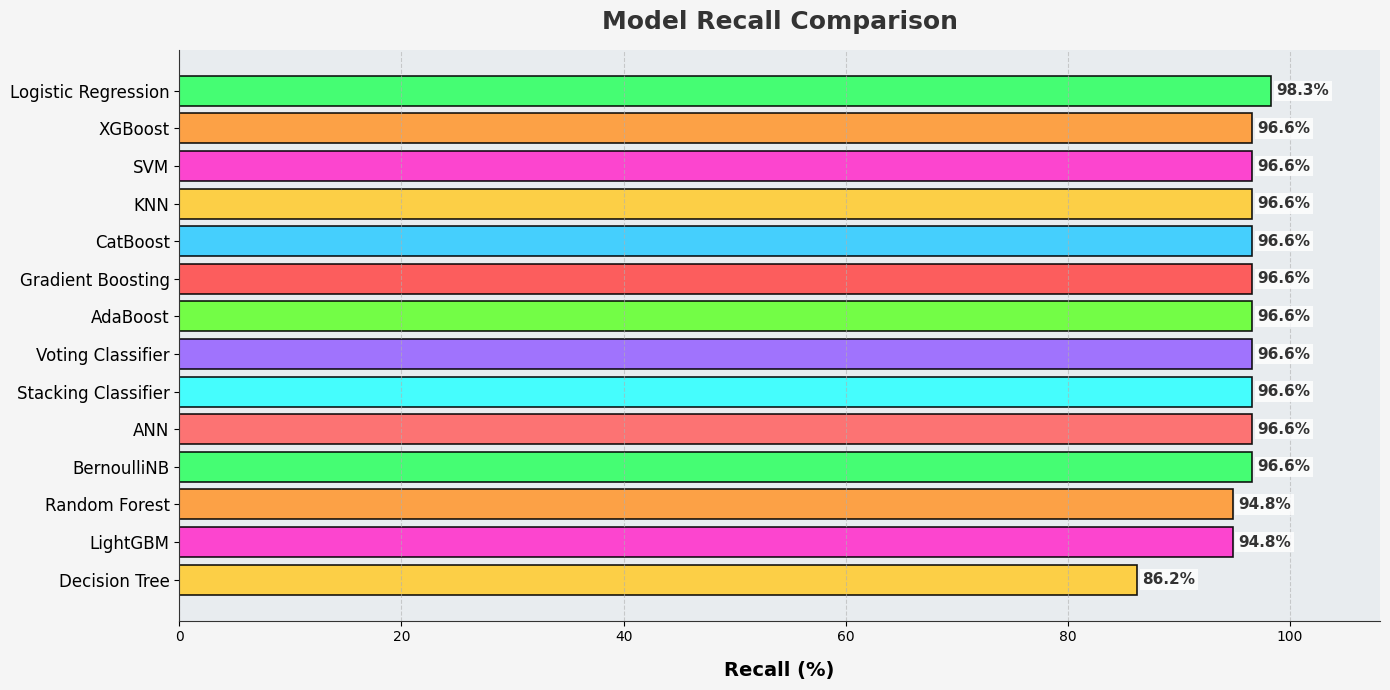

In [84]:
results_df = plot_recall_horizontal(models, x_test, y_test)


In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
import random

def plot_precision_horizontal(models, x_test, y_test):
    """
    Plot horizontal bar chart of Precision for multiple models.
    """
    results = []
    for name, model in models.items():
        try:
            y_pred = model.predict(x_test)
            # Handle ANN probabilities
            if hasattr(y_pred, "ndim") and y_pred.ndim > 1:
                y_pred = (y_pred > 0.5).astype(int).ravel()
            else:
                y_pred = y_pred.astype(int)
        except Exception as e:
            print(f" Skipping {name}: {e}")
            continue

        results.append({
            "Model": name,
            "Precision (%)": precision_score(y_test, y_pred, zero_division=0) * 100
        })

    if not results:
        print("No valid predictions. Check your models or data.")
        return pd.DataFrame()

    df = pd.DataFrame(results).sort_values(by="Precision (%)", ascending=False).reset_index(drop=True)
    print("\n Precision Summary (in %):\n")
    print(df.round(2))

    # Bright colors for bars
    bright_colors = [
        "#FF4D4D", "#33CCFF", "#33FF66", "#FF9933", "#FF33CC",
        "#33FFFF", "#9966FF", "#FF6666", "#66FF33", "#FFCC33"
    ]
    random.shuffle(bright_colors)
    num_bars = len(df)
    colors = (bright_colors * ((num_bars // len(bright_colors)) + 1))[:num_bars]

    plt.figure(figsize=(14, max(6, num_bars*0.5)), facecolor='#F5F5F5')
    ax = plt.gca()
    ax.set_facecolor('#E8ECEF')

    y_pos = np.arange(num_bars)
    bars = plt.barh(y_pos, df["Precision (%)"], color=colors, edgecolor='black', linewidth=1.2, alpha=0.9)

    ax.invert_yaxis()  # Highest Precision on top

    # Annotate bars
    max_val = df["Precision (%)"].max()
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.1f}%",
                 ha='left', va='center', fontsize=11, weight='bold', color='#333333',
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))

    plt.yticks(y_pos, df["Model"], fontsize=12, weight='medium')
    plt.xlabel("Precision (%)", fontsize=14, weight='bold', labelpad=12)
    plt.title(" Model Precision Comparison", fontsize=18, weight='bold', pad=15, color='#333333')
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#333333')
    ax.spines['bottom'].set_color('#333333')

    plt.xlim(0, max_val * 1.1)
    plt.tight_layout()
    plt.show()

    return df


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

 Precision Summary (in %):

                  Model  Precision (%)
0                   KNN         100.00
1                   SVM          98.25
2              CatBoost          96.55
3     Gradient Boosting          96.55
4     Voting Classifier          96.55
5   Stacking Classifier          96.55
6         Random Forest          96.49
7              LightGBM          96.49
8         Decision Tree          96.15
9   Logistic Regression          95.00
10              XGBoost          94.92
11             AdaBoost          94.92
12                  ANN          94.92
13          BernoulliNB          94.92


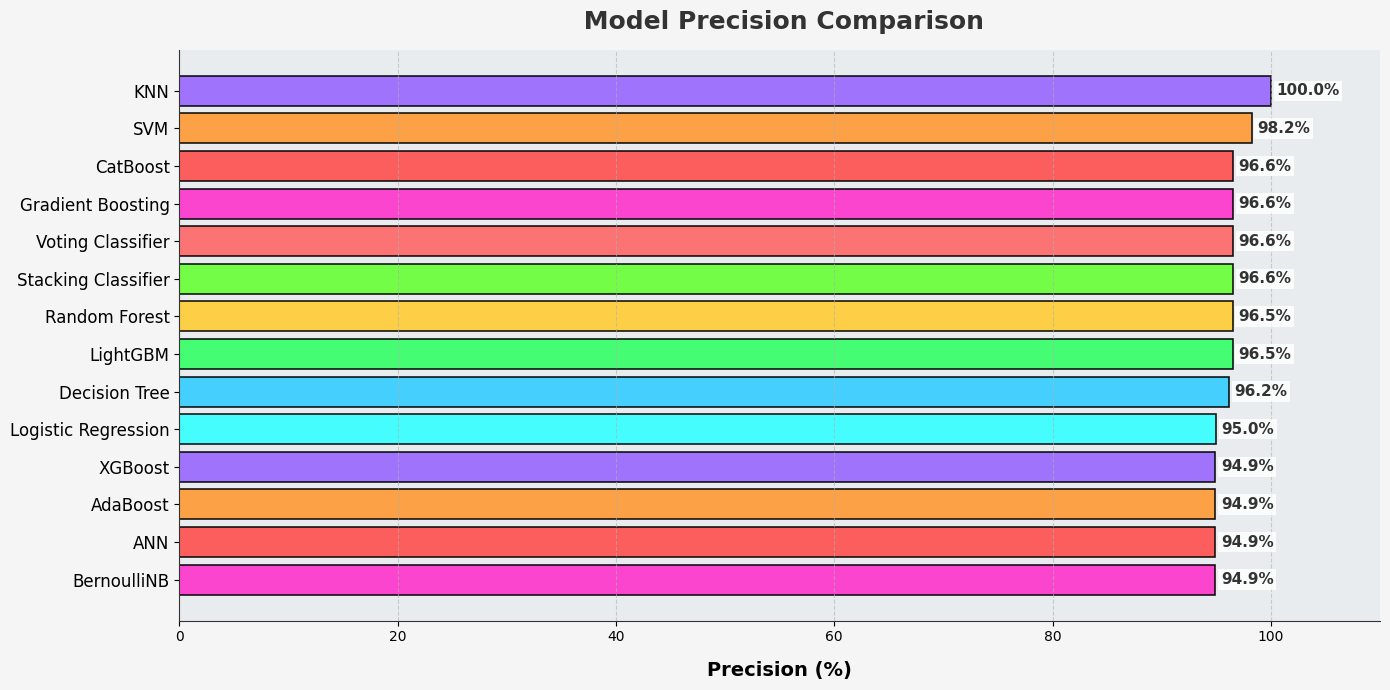

In [86]:
results_df = plot_precision_horizontal(models, x_test, y_test)


In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
import random

def plot_metrics_horizontal(models, x_test, y_test):
    """
    Plot horizontal bar chart of Accuracy, Precision, and Recall for multiple models.
    """
    results = []
    for name, model in models.items():
        try:
            y_pred = model.predict(x_test)
            # Handle ANN probabilities
            if hasattr(y_pred, "ndim") and y_pred.ndim > 1:
                y_pred = (y_pred > 0.5).astype(int).ravel()
            else:
                y_pred = y_pred.astype(int)
        except Exception as e:
            print(f" Skipping {name}: {e}")
            continue

        results.append({
            "Model": name,
            "Accuracy (%)": accuracy_score(y_test, y_pred) * 100,
            "Precision (%)": precision_score(y_test, y_pred, zero_division=0) * 100,
            "Recall (%)": recall_score(y_test, y_pred, zero_division=0) * 100
        })

    if not results:
        print("No valid predictions. Check your models or data.")
        return pd.DataFrame()

    df = pd.DataFrame(results).sort_values(by="Accuracy (%)", ascending=False).reset_index(drop=True)
    print("\n Metrics Summary (in %):\n")
    print(df.round(2))

    metrics = ["Accuracy (%)", "Precision (%)", "Recall (%)"]
    colors_palette = {
        "Accuracy (%)": "#FF4D4D",  # Red
        "Precision (%)": "#33CCFF", # Blue
        "Recall (%)": "#33FF66"     # Green
    }

    num_models = len(df)
    bar_height = 0.2
    y_pos = np.arange(num_models)

    plt.figure(figsize=(14, max(6, num_models*0.6)), facecolor='#F5F5F5')
    ax = plt.gca()
    ax.set_facecolor('#E8ECEF')

    # Plot bars side by side
    for i, metric in enumerate(metrics):
        bars = ax.barh(y_pos + (i - 1) * bar_height, df[metric], height=bar_height,
                       color=colors_palette[metric], edgecolor='black', linewidth=1.2, alpha=0.9, label=metric)
        # Annotate bars
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f"{width:.1f}%",
                     ha='left', va='center', fontsize=10, weight='bold', color='#333333',
                     bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))

    ax.invert_yaxis()  # Highest Accuracy top
    plt.yticks(y_pos, df["Model"], fontsize=12, weight='medium')
    plt.xlabel("Score (%)", fontsize=14, weight='bold', labelpad=12)
    plt.title(" Model Metrics Comparison (Accuracy, Precision, Recall)", fontsize=18, weight='bold', pad=15, color='#333333')
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#333333')
    ax.spines['bottom'].set_color('#333333')

    plt.xlim(0, 105)
    plt.legend(title="Metrics", fontsize=12)
    plt.tight_layout()
    plt.show()

    return df


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

 Metrics Summary (in %):

                  Model  Accuracy (%)  Precision (%)  Recall (%)
0                   KNN         98.35         100.00       96.55
1                   SVM         97.52          98.25       96.55
2   Logistic Regression         96.69          95.00       98.28
3              CatBoost         96.69          96.55       96.55
4     Gradient Boosting         96.69          96.55       96.55
5     Voting Classifier         96.69          96.55       96.55
6   Stacking Classifier         96.69          96.55       96.55
7         Random Forest         95.87          96.49       94.83
8               XGBoost         95.87          94.92       96.55
9              AdaBoost         95.87          94.92       96.55
10             LightGBM         95.87          96.49       94.83
11                  ANN         95.87          94.92       96.55
12          BernoulliNB         95.87          94.92       96.55
13        Decision Tree  

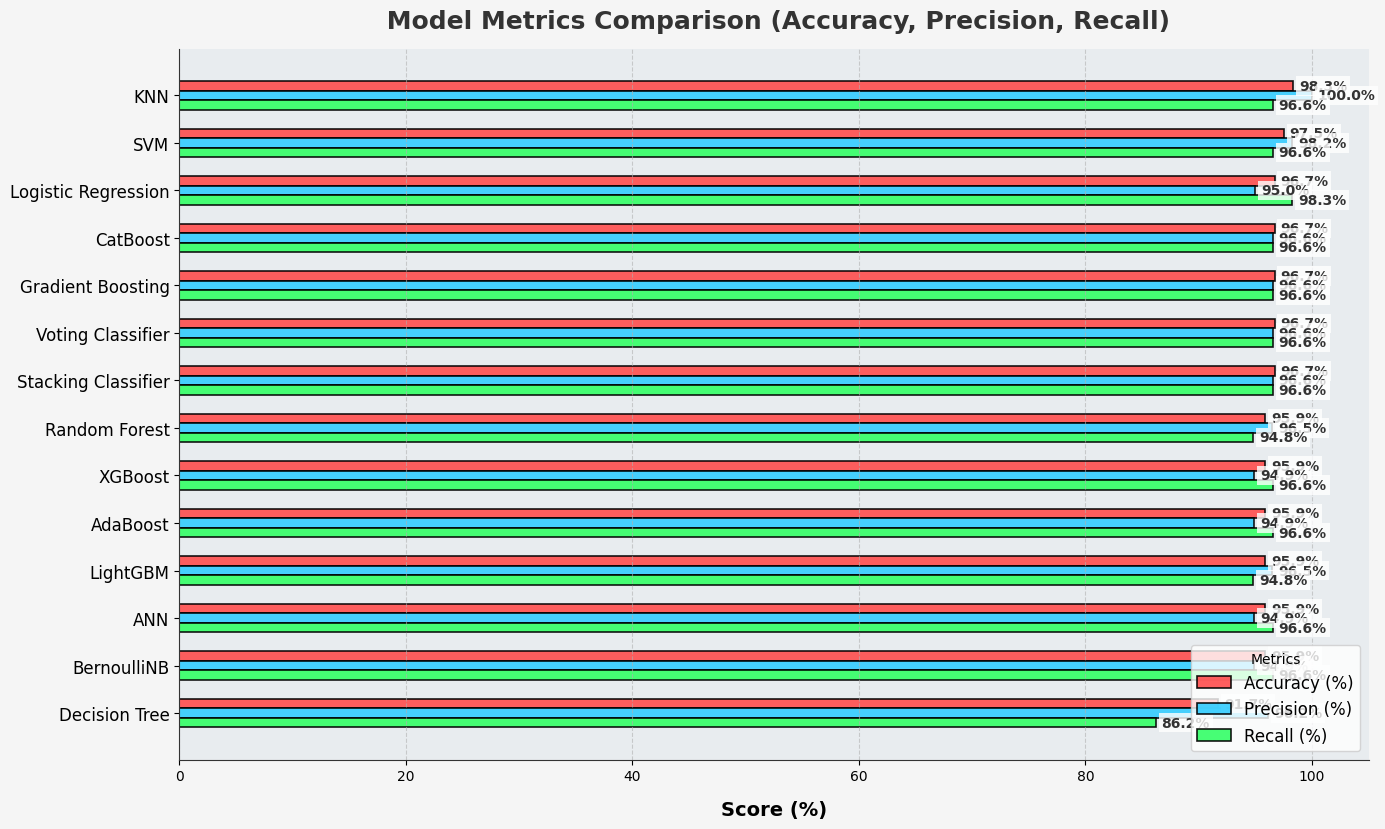

In [88]:
results_df = plot_metrics_horizontal(models, x_test, y_test)


# Conclusion

**we wil go with catboost tecnique**

# CatBoost

In [89]:
# After trying 14 algorithms we can say Boosting techniques
# still dominating ...in overall accuracy , precision , recall , f1 score and
# roc curve .....

# we can say catboost  performance is extreme accurate

# overall accuracy : 99.16
# recall           : 100 (madatory for medical dataset)
# precsion         98.31


